In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import pandas as pd
import unicodedata
import scipy.stats as stat

In [42]:
def eVtoJ(eV):
    return(eV*1.602*10**-19)

def JtoeV(J):
    return(J/(1.602*10**-19))


def Relativistic_velocity(E,m):
    c = 299792458 #m/s
    v = c * (1 - (E/(m*c**2)+1)**-2)**0.5 #m/s
    print("Velocity = "+str(v))
    return(v)

def Bethe(m,E,N,Z,z,I,M):
    p = np.pi
    c = 299792458 #m/s
    e = 1.602 * 10 ** -19 #C
    eta = 8.854*10**-12 #C^2*s^2/(kg*m^3) 
    #N_a = 6.022 * 10 ** 23 #mol^-1
    #mc2 = m*c**2 #J
    #print("mc2 = "+str(mc2))
    E = eVtoJ(E*10**6) #J
    #var = E/mc2 + 1
    #C_teller = e**4 * z**2 * N_a * Z
    #C_noemer = 4*p*eta**2*M*mc2
    #C = C_teller/C_noemer
    #print("C = "+str(C))
    #PreLn = ( 1 - var**-2 )**-1
    #Ln1 = 2*mc2*(1-var**-2)/I
    #Ln2 = var
    #S = C*PreLn*(sp.log(Ln1)+2*sp.log(Ln2)-1+var**-2) * 10**4
    v = Relativistic_velocity(E,m) #m/s
    C = (4*p*e**4*z**2)/m * N /(4*p*eta)**2#*Z
    print(C)
    S = C*v**-2*( sp.log((2*m*v**2)/I) - sp.log(1-(v/c)**2) - (v/c)**2 ) * 10**4
    return(JtoeV(S)*10**-6)
#((2.4514*10^-18)/(1-(k/(8.187*10^-14)+1)^-2)*(ln(2*(8.187*10^-14)*(1-(k/(8.187*10^-14)+1)^-2)/(2.77*10^-17))+2ln(k/(8.187*10^-14)+1)-1+(k/(8.187*10^-14)+1)^-2))^-1

In [40]:
c = 299792458 #m/s
e = 1.6021766208 * 10 ** -19 #C
me = 9.109534 * 10 ** -31 #kg
N_a = 6.022 * 10 ** 23 #mol^-1

I_Si = eVtoJ(173) #J #140
Z_Si = 14
Rho_Si = 2.33 #g/cm^3 #2.329
M_Si = 28.085 #g/mol
N_Si = (N_a * Z_Si / M_Si) #g^-1
print(N_Si)
print(I_Si)

3.0018871283603345e+23
2.7714600000000002e-17


In [44]:
b = Bethe(me, 1*10**-2, N_Si, Z_Si, 1, I_Si, M_Si)
print(b) #MeV*cm^2/g
#print(16.89/b)
#print(eVtoJ(0.2*10**6))

Velocity = 58451616.70385952
0.22032275077666647
21.7975360095702


Integral(sin(4*x), x)


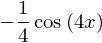

In [12]:
x = sp.symbols('x')
inerteint = sp.Integral(sp.sin(4*x),x)   # Verschil tussen inert en actief commando
print(inerteint)
inerteint.doit()

In [9]:
sp.integrate(sp.sin(4*x),x)

-cos(4*x)/4

In [26]:

sp.integrate(Bethe(me, x, N_Si, Z_Si, 1, I_Si, M_Si)**-1, x)

PolynomialDivisionFailed: couldn't reduce degree in a polynomial division algorithm when dividing [14.6588458900255/14.6588458900255, (29.317691780051*x**4*_t0 - 14.6588458900255*x**4 + 59.9328349600498*x**3*_t0 - 29.9664174800249*x**3 + 45.9442467362746*x**2*_t0 - 19.1434361401144*x**2 + 15.653625222084*x*_t0 - 3.913406305521*x + 2.0*_t0)/(14.6588458900255*x**4 + 29.9664174800249*x**3 + 22.9721233681373*x**2 + 7.826812611042*x + 1.0)] by [(148663209.462281*x**22 + 1671480215.87029*x**21 + 8930616720.54669*x**20 + 30162841925.7382*x**19 + 72268583664.4928*x**18 + 130673065380.32*x**17 + 185208735543.219*x**16 + 210985406572.144*x**15 - 8.5848821227158e-8*x**14*_t0 + 196530209712.809*x**14 - 4.93347503698426e-7*x**13*_t0 + 151494684101.814*x**13 - 1.27114320464332e-6*x**12*_t0 + 97439749049.2018*x**12 - 1.93900863463873e-6*x**11*_t0 + 52573542841.1122*x**11 - 1.94525384250942e-6*x**10*_t0 + 23864506671.2593*x**10 - 1.34658613896527e-6*x**9*_t0 + 9119329894.81118*x**9 - 6.55373831561416e-7*x**8*_t0 + 2928356439.886*x**8 - 2.23718205867837e-7*x**7*_t0 + 786522086.198057*x**7 - 5.22950909375057e-8*x**6*_t0 + 175201969.404757*x**6 - 7.92449503288656e-9*x**5*_t0 + 31918053.5016196*x**5 - 6.93620106266609e-10*x**4*_t0 + 4650285.64011644*x**4 - 2.6087045597563e-11*x**3*_t0 + 522592.447196524*x**3 + 42609.4902844376*x**2 + 2244.96544146786*x + 57.3660199376865)/(74331604.7311406*x**23 + 873728294.659467*x**22 + 4892424812.12558*x**21 + 17363478082.2506*x**20 + 43836788224.7783*x**19 + 83754220213.1242*x**18 + 125769024646.781*x**17 + 152163558928.339*x**16 + 150837818047.084*x**15 + 123911399490.514*x**14 + 84980240154.3858*x**13 + 48859107749.0771*x**12 + 23582888804.0722*x**11 + 9543723170.04183*x**10 + 3225089853.28793*x**9 + 903472265.681755*x**8 + 207467374.26702*x**7 + 38406807.1867231*x**6 + 5592115.643178*x**5 + 616710.659314977*x**4 + 48429.8588026727*x**3 + 2413.33784957794*x**2 + 57.3660199376865*x)]. This can happen when it's not possible to detect zero in the coefficient domain. The domain of computation is RR(x,_t0). Zero detection is guaranteed in this coefficient domain. This may indicate a bug in SymPy or the domain is user defined and doesn't implement zero detection properly.